# Linear Regression
- A statistical / machine learning model for regression.
- Model the relationship between a dependent variable and one or more independent variables.
- Equation: $$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon $$
  - Dependent variable: $$ Y $$
  - Independent variables: $$ X_1, X_2, \ldots, X_n $$
  - Coefficients: $$ \beta_0, \beta_1, \beta_2, \ldots, \beta_n $$
  - Error term: $$ \epsilon $$
  ![linear_reg](../assets/linear_reg.jpeg)
 
- Assumptions: 
  - Linear relationship between dependent and independent variables
  - No multicollinearity among independent variables
  - Homoscedasticity: Constant variance of errors
  - Normal distribution of errors
- Example: Predicting house prices based on various features like size, location, number of bedrooms, etc.

## Training / Fitting the Model

### Cost function

- Definition: A measure of how far off our predictions are from the actual values.

- Mean Squared Error (MSE): $$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
  - Actual value: $$y_i$$
  - Predicted value: $$ \hat{y_i} $$
  - Number of observations: $$ n $$

### Objective

- The goal is to find the values of the coefficients that minimize the sum of the squared differences between the observed values and the values predicted by the linear equation.
    - **Ordinary Least Squares (OLS)**: OLS is the most common method used in linear regression to estimate the coefficients. Often involves solving a set of linear equations or using optimization algorithms.
    - **Gradient Descent**: An optimization algorithm used to minimize the cost function by iteratively moving towards the minimum.

## Evaluating the Model

### R-Squared (R²) in Linear Regression

R-squared, often denoted as R², is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model.

#### Definition and Formula

R² is defined as the ratio of the variance explained by the model to the total variance. It is calculated as:

$$ R^2 = 1 - \frac{\text{Sum of Squares of Residuals (SSR)}}{\text{Total Sum of Squares (SST)}} $$

where,
- SSR (Sum of Squares of Residuals) is the sum of the squares of the model residuals.
- SST (Total Sum of Squares) is the total sum of the squares of the difference from the mean.

#### Interpretation

- **Value Range**: R² ranges from 0 to 1.
- **Higher R²**: A higher R² indicates a better fit of the model. An R² of 1 means that the regression predictions perfectly fit the data.
- **Limitation**: While a high R² indicates a good fit, it doesn’t guarantee that the model is appropriate. Overfitting, where the model is too complex, can lead to misleadingly high R² values.

![sst_ssr](../assets/sst_ssr.png)

### Sum of Squares in Linear Regression

Sum of Squares is a measure used in statistical analysis to quantify variations in data points.

#### 1. Total Sum of Squares (SST)

SST measures the total variation in the dependent variable. It is calculated as:

$$ \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

where $ y_i $ is the actual value, $ \bar{y} $ is the mean of the dependent variable, and $ n $ is the number of observations.

#### 2. Sum of Squares of Residuals (SSR)

SSR, also known as the sum of squared errors of the model, measures the unexplained variation by the model. It is calculated as:

$$ \text{SSR} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $ \hat{y}_i $ is the predicted value.

#### Importance in Regression Analysis

- **SST**: Reflects the total variation in the data.
- **SSR**: Indicates the amount of variation not explained by the model.
- **Balance**: A good model minimizes SSR and explains most of the SST.

Sum of Squares helps in understanding the effectiveness of the regression model in explaining the variance of the data. The lower the SSR in comparison to SST, the better the model's predictive capabilities.

## Scikit-Learn Tutorial

Let's implement linear regression in Python using the Scikit-Learn (`sklearn`) library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Let's create a synthetic dataset using NumPy.

In [2]:
np.random.seed(0)
# Array of 100 values with mean = 1.5, stddev = 2.5
X = 2.5 * np.random.randn(100) + 1.5
# Generate 100 residual terms
res = 0.5 * np.random.randn(100)
# Actual values of Y (equation)
y = 2 + 0.3 * X + res

In [3]:
# Convert X and y into a pandas DataFrame
df = pd.DataFrame({
    'X': X,
    'y': y
})

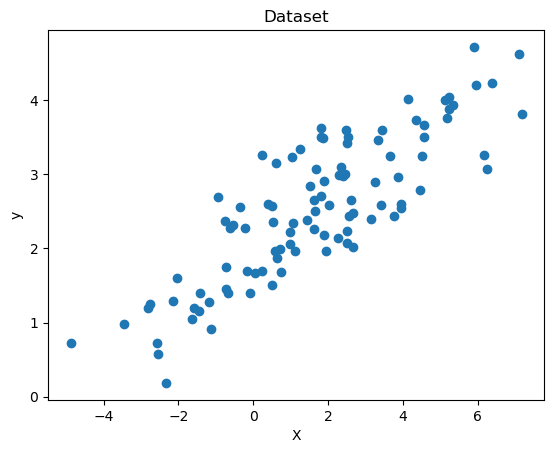

In [5]:
# It's often useful to visualize the data before building models.
plt.scatter(df['X'], df['y'])
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Before we train (fit) the model, we'll need to split the dataset into `training` and `testing` sets. The split is an `80:20` (which can be arbitrary).

The reason for splitting the dataset is to avoid overfitting. Overfitting occurs when the model learns the training data too well, including the noise, and is unable to generalize to new  / unseen data. We will fit the model on the training set and evaluate it on the testing set (unseen data).

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.2, random_state=0)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [10]:
X_train.shape

(80, 1)

In [11]:
X_test.shape

(20, 1)

Now, let's train (fit) the model.

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Use the model to make predictions on the test set.
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model's performance on the test set using metrics like Mean Squared Error (MSE) and R-squared.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.245222733362597
R^2 Score: 0.6280065468471038


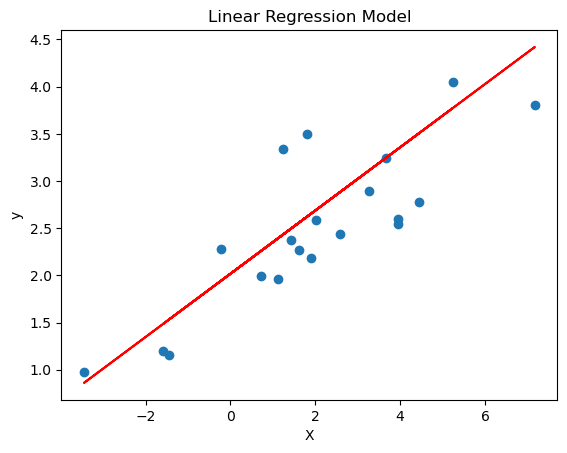

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression Model')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Statsmodels Tutorial

We can also implement linear regression using the `statsmodels` library.

In [18]:
import statsmodels.api as sm

Prepare the predictor and response variables, for statsmodels we need to add a constant term to the predictor.

In [19]:
X = df['X']
y = df['y']
X = sm.add_constant(X)  # Adds a constant term to the predictor

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
model = sm.OLS(y_train, X_train).fit()

Statsmodels provides extensive statistical diagnostics and tests about the model, such as _p-values, confidence intervals, and in-depth analysis of residuals._

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     207.1
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           1.17e-23
Time:                        22:44:23   Log-Likelihood:                -61.385
No. Observations:                  80   AIC:                             126.8
Df Residuals:                      78   BIC:                             131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0169      0.069     29.056      0.000       1.879       2.155
X              0.3351      0.023     14.392      0.000       0.289       0.381
==============================================================================
Omnibus:                        2.891   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.722
Skew:                           0.048   Prob(JB):                        0.423
Kurtosis:                       2.288   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Use the model to make predictions on the test set.
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model's performance on the test set using metrics like Mean Squared Error (MSE) and R-squared.

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.2452227333625967
R^2 Score: 0.6280065468471042


The results are the same as sklearn's model above.

## Exercise

Now, use the statsmodels library to perform linear regression on the "diamonds" dataset, which contains the prices and attributes of almost 54,000 diamonds. We'll try to predict the price of a diamond based on its carat weight.

In [30]:
import seaborn as sns

In [32]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [95]:
X = diamonds['carat']
y = diamonds['price']
# Adds a constant term to the predictor
X = sm.add_constant(X)

In [96]:
# let's use 30% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [97]:
model = sm.OLS(y_train, X_train).fit()

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.117e+05
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:46:04   Log-Likelihood:            -3.3100e+05
No. Observations:               37758   AIC:                         6.620e+05
Df Residuals:                   37756   BIC:                         6.620e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2247.7045     15.629   -143.812      0.000   -2278.339   -2217.070
carat       7741.3790     16.827    460.059      0.000    7708.398    7774.360
==============================================================================
Omnibus:                     9735.449   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           112199.524
Skew:                           0.912   Prob(JB):                         0.00
Kurtosis:                      11.246   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
y_pred = model.predict(X_test)

In [100]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2372901.2792871664
R^2 Score: 0.8509771156910653


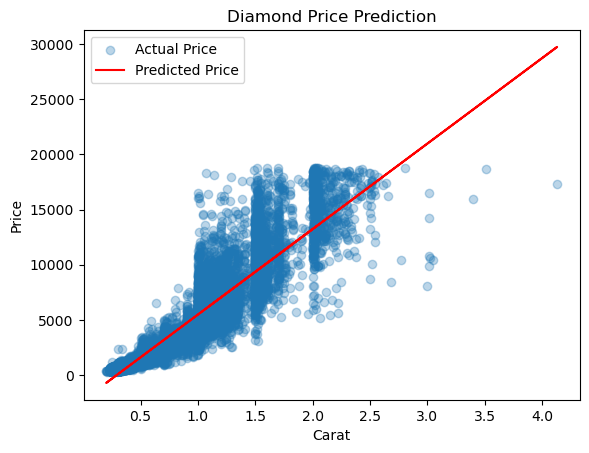

In [42]:
plt.scatter(X_test['carat'], y_test, alpha=0.3, label='Actual Price')
plt.plot(X_test['carat'], y_pred, color='red', label='Predicted Price')
plt.title('Diamond Price Prediction')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

# Logistic Regression
- A statistical / machine learning model for classification, specifically binary (`positive or 1` class vs `negative or 0` class) classification.
- Model the probability that a given input point belongs to the positive class (negative probability is just `1 - positive probability`)
- Equation: $$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X)}} $$
  - Uses the `logistic function (Sigmoid function)` to model the linear predicted output (from a linear regression) into a binary output variable.
  - The logistic function converts any input to a value between 0 and 1, which is interpreted as a probability of the instance belonging to the positive class.
  ![log_reg](../assets/log_reg.png)

- Concepts:
  - Odds: $$ \frac{P(Y=1)}{1 - P(Y=1)} $$
  - In the context of probability, "odds" is a way of expressing the likelihood that a particular event will occur. Odds are calculated as the ratio of the probability of the event occurring to the probability of the event not occurring.
  - Log-Odds: $$ \log\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = \beta_0 + \beta_1X $$
  - Log odds, or the logit function, is the logarithm of the odds. In logistic regression, the logit function is used to create a linear combination of the independent variables.
  - The logistic function is the inverse of the logit function. It takes the log odds and transforms them back into a probability.

- Example: Binary classification tasks such as email spam detection, image recognition, etc.

## Training / Fitting the Model

### Maximum Likelihood Estimation

- Objective: Find the values of coefficients that maximize the `likelihood (function)` of observing the given sample.
- Likelihood Function: Measures how well our model explains the observed data.
- Procedure:
  1. Define the likelihood function for the logistic regression model.
  2. Use optimization techniques (e.g., gradient descent) to maximize the likelihood function.
  3. The values of coefficients that maximize the likelihood function are considered as the estimates.

## Scikit-Learn Tutorial
For this tutorial, we'll use the Iris dataset, which is a classic dataset for classification. The dataset contains 150 observations of iris flowers. 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
X = iris.data
y = iris.target

We'll need to convert the problem to a binary classification for logistic regression. Drop the additional class.

In [45]:
X = X[y != 2]
y = y[y != 2]

In [46]:
X.shape

(100, 4)

In [47]:
y.shape

(100,)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

We'll use `Accuracy Score` to evaluate the performance of the model.

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Observations}} $$

> There are many more metrics to evaluate classification models, which we'll cover in the next unit.

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [59]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

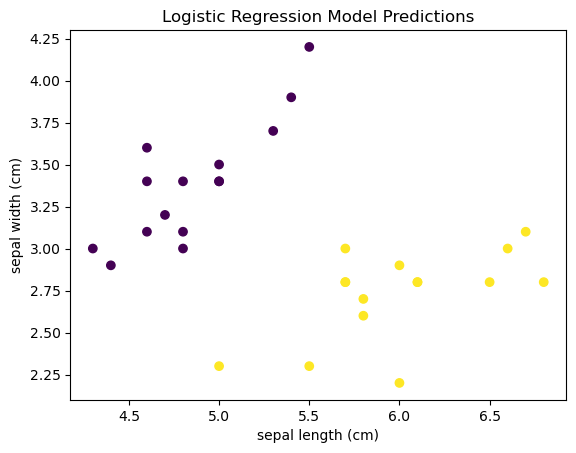

In [61]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel(f'{iris.feature_names[0]}')
plt.ylabel(f'{iris.feature_names[1]}')
plt.title('Logistic Regression Model Predictions')
plt.show()

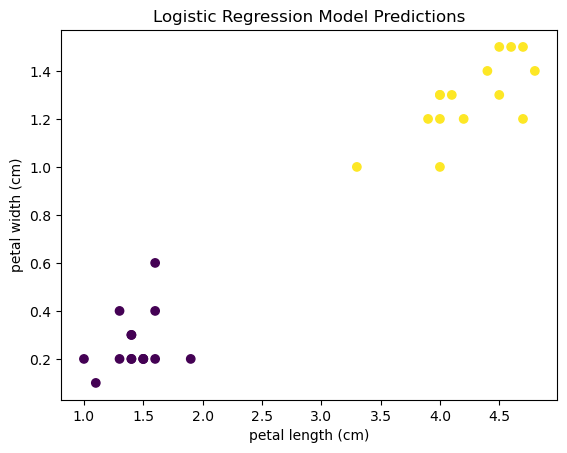

In [62]:
plt.scatter(X_test[:, 2], X_test[:, 3], c=y_pred)
plt.xlabel(f'{iris.feature_names[2]}')
plt.ylabel(f'{iris.feature_names[3]}')
plt.title('Logistic Regression Model Predictions')
plt.show()

## Statsmodels Tutorial

We can also implement logistic regression using the `statsmodels` library.

Again, the benefits of statsmodels is it provides extensive statistical diagnostics and tests about the model, such as _p-values, confidence intervals, and in-depth analysis of residuals._

Let's use another more realistic dataset such as the _Pima Indians Diabetes_ dataset.

In [73]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
pima = pd.read_csv(url, names=column_names)

In [75]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's try to predict the diabetes outcome using glucose, BMI and age.

In [76]:
features = ['Glucose', 'BMI', 'Age']
X = pima[features]
y = pima['Outcome']

In [77]:
# Adds a constant term to the predictor
X = sm.add_constant(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [79]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.490188
         Iterations 6


In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      533
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.2506
Time:                        00:04:36   Log-Likelihood:                -263.23
converged:                       True   LL-Null:                       -351.27
Covariance Type:            nonrobust   LLR p-value:                 6.168e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6925      0.815    -10.670      0.000     -10.289      -7.096
Glucose        0.0317      0.004      7.899      0.000       0.024       0.040
BMI            0.0885      0.016      5.406      0.000       0.056       0.121
Age            0.0352      0.009      3.832      0.000       0.017       0.053
==============================================================================
"""

In [83]:
y_prob = model.predict(X_test)

In [84]:
# y_prob is an array of probabilities, we need to convert it to predicted class
y_pred = np.array([1 if x > 0.5 else 0 for x in y_prob])

In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576


# K-Nearest Neighbors (K-NN)
- A machine learning model for regression and classification.
- Algorithm:
  1. Compute the distance between the test data point and each of the training data points.
  2. Identify the 'k' nearest data points to the test data point.
  3. Perform a majority vote (for classification) or average (for regression) of these 'k' nearest points.
- Distance Metrics:
  - Euclidean Distance
  - Manhattan Distance
  - Minkowski Distance
 
The Euclidean distance between two points in Euclidean space is a measure of the length of a straight line between these two points. In a space with $ p $ dimensions, the Euclidean distance between two points, $ P $ and $ Q $, with coordinates $ P = (p_1, p_2, \ldots, p_p) $ and $ Q = (q_1, q_2, \ldots, q_p) $, is given by the formula:

$$ d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_p - q_p)^2} $$

In a more generalized and compact form, it can be written as:

$$ d(P, Q) = \sqrt{\sum_{i=1}^{p} (p_i - q_i)^2} $$

where $ \sum $ denotes the summation and $ \sqrt{} $ denotes the square root.

> We'll dive deeper into `Manhattan` and `Minkowski` Distance in Unit 3.6: Unsupervised Learning.
- Example: If k=3, and the three closest points to a test instance are of classes A, A, and B, the algorithm would classify the test instance as class A.

![knn](../assets/knn.png)

Choosing the Right 'k' in K-NN
- Small 'k' value:
  - Pros: Captures the nuances in the data.
  - Cons: Sensitive to noise in the data; higher variance.
- Large 'k' value:
  - Pros: More stable and robust to noise.
  - Cons: May oversimplify the model; higher bias.

> We'll dive deeper into this in Unit 3.5: Model Evaluation

## Scikit-Learn Tutorial

Let's apply KNN on the `diamonds` regression problem.

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [102]:
X = diamonds['carat']
y = diamonds['price']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [92]:
k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [93]:
y_pred = knn_reg.predict(X_test)

In [94]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2410513.0678062043


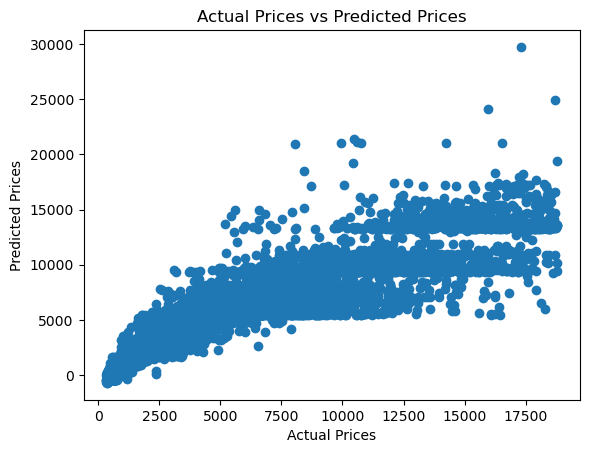

In [101]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

We can experiment with different `k` values and see how they affect the performance.

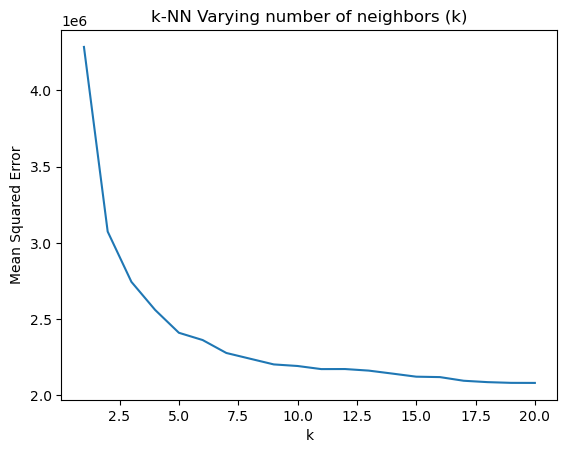

In [105]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.plot(range(1, 21), errors)
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.show()


## Exercise

Now, let's practice on the `iris` dataset for classification, without dropping class `2`. Hence, this will be a multi-class (>2) classification

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
iris = load_iris()
X = iris.data
y = iris.target

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [109]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
y_pred = model.predict(X_test)

In [111]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9777777777777777
